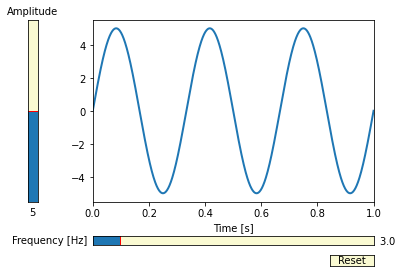

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

axcolor = 'lightgoldenrodyellow'
ax.margins(x=0)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor)
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

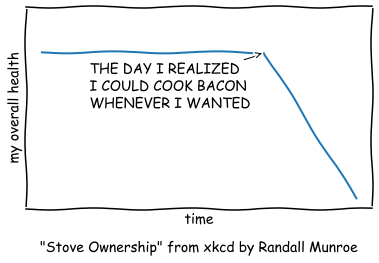

In [6]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#     ax.spines.right.set_color('none')
#     ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

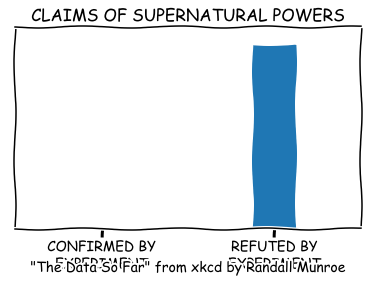

In [10]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
#     ax.spines.right.set_color('none')
#     ax.spines.top.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()

## Built-in data sets
https://medium.com/analytics-vidhya/built-in-datasets-in-python-24adca42012c

In [12]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [13]:
import pandas as pd
wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
len(wine_data)

178

In [15]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
iris_data = pd.DataFrame(datasets.load_iris().data)
iris_data.columns = datasets.load_iris().feature_names
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
datasets.load_iris().target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
iris_data['target'] = datasets.load_iris().target

In [37]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
datasets.load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',**
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',

In [26]:
data = pd.DataFrame(datasets.load_linnerud().data)
data.columns = datasets.load_linnerud().feature_names
data.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [27]:
len(data)

20

In [28]:
charsDF = pd.read_csv('lotr_characters.csv')
scriptDF = pd.read_csv('lotr_scripts.csv')

In [40]:
len(charsDF)

911

In [41]:
charsDF.gender.unique()

array(['Female', 'Male', nan, 'Males', 'Most likely male', 'male'],
      dtype=object)

In [42]:
charsDF.race.unique()

array(['Men', 'Orcs', 'Dragon', 'Elves', nan, 'Hobbits', 'Dwarves',
       'Dragons', 'Great Spiders', 'Black Uruk', 'Maiar', 'Ainur',
       'Hobbit', 'Raven', 'Men,Wraith', 'Elf', 'God', 'Wolfhound',
       'Half-elven', 'Men,Rohirrim', 'Maiar,Balrog', 'Werewolves',
       'Dwarven', 'Goblin,Orc', 'Horse', 'Orc', 'Eagles', 'Uruk-hai',
       'Great Eagles', 'Men,Skin-changer', 'Maiar,Balrogs',
       'Uruk-hai,Orc', 'Orc,Goblin', 'Elves,Noldor', 'Drúedain',
       'Urulóki', 'Ents,Onodrim', 'Skin-changer', 'Ents', 'Elves,Maiar',
       'Balrog', 'Eagle', 'Dwarf', 'Stone-trolls', 'Vampire',
       'Men,Undead', 'Half-elven,Men', 'Ainur,Maiar'], dtype=object)

In [43]:
charsDF.realm.unique()

array([nan, 'Arnor', 'Númenor', 'Gondor', 'Rohan', 'Tirion,Formenos',
       'Hithlum', 'Hithlum,Beleriand', 'Tirion', 'Shire', 'Minas Ithil',
       'Lonely Mountain', 'Torech Ungol', 'Cirith Ungol',
       'Isengard,Nan Curunír', 'Bree', 'Rhûn,Dol Guldur,Sauron',
       'Arnor,Gondor', 'Valinor,Taniquetil', 'Timeless Halls',
       'Nan Elmoth', 'Rivendell', 'Reunited Kingdom,Arnor,Gondor',
       'Woodland Realm', 'Nargothrond', 'Tol Eressëa,Alqualondë',
       'Grey Mountains', 'Khazad-dûm', 'Brethil', 'Khazad-dum', 'Doriath',
       'Ossiriand', 'Himlad', 'Pastures of Yavanna', 'Old Forest',
       'Lake-town,Dale,Rhûn,Dorwinion', 'Valinor,Halls of Nienna',
       'Valinor', 'Tol Eressëa', 'Utumno,Angband,Middle-earth,Beleriand',
       'Isengard,Saruman', 'Lake-town', 'Arda,Valinor',
       'Minas Morgul,the Witch-King', 'Buckland', 'Mount Gram',
       'Havens of Sirion,Lindon', 'Arthedain', 'Eregion',
       'Eregion,Lothlórien,Caras Galadhon', 'Angband',
       'Angmar,Minas M

In [46]:
charsDF.hair.unique()

array([nan, 'Dark (book) Light brown (movie)', 'Golden', 'Dark', 'Black',
       'Brown (film)', 'Raven', 'None', 'Various ', 'White', 'Sandy',
       'Brown-gray (films)', 'Brown Gray (movie)', 'Probably Golden',
       'Varies, White ', 'Golden, grey (in old age)',
       'Reddish brown (movie)', 'Blond (Video game)', 'Star-like ',
       'Pale gold', 'Blond', 'Dirty blond', 'Possibly dark', 'Brown',
       'Dark-brown', 'Silver', 'Gray', 'Mane of red flames',
       'Dark (Decipher Card)', 'Gray (film)', 'Dark, grey (in old age)',
       'Dark ', 'Silver, bearded', 'White or grey', 'Ginger',
       'Brown (movie)', 'Dark Brown (films)', 'Brown, later white',
       'Black/ Grey (film)', 'Possibly golden', 'Reddish brown',
       'Most likely black or none', 'Dark, grey in old age',
       'Black (film)', 'Auburn (film)', 'Became grey in captivity',
       'Grey/white strands of hair (film)',
       'white/gray, possibly light brown (film)', 'black', 'Blonde',
       'Red, later Whit

In [47]:
charsDF.height.unique()

array([nan, 'Tall', 'Tallest of the Elves of Gondolin',
       'Large and immense', "7'1", 'Various until ', 'Short',
       '1.22m (4\'0") ', '1.17m (3\'10")', "Very tall almost 7'1",
       'Varies', 'Tallest of all mortal men save his son Tuor only',
       'Horse-sized', "Tall-6'6", '7\' 10"', '1.22m (4\'0")',
       "4'5 - 5' (Estimate) ",
       'Slightly larger and taller than a Man (book), 20 feet (movie)',
       'Very tall', 'Various', '8,4  Body weight = 190kg',
       '1.25m (4\'1")', '4\'5" (film)', '6\' 7" (2.01 m)',
       'Any size by choice', 'Tall (6\'4")', 'Tall (in Man-form)',
       'About nine feet (film)', '5\'9" - 6\'4" (film)', 'medium',
       'Gigantic', 'Unknown (book) 1.66m (5\'5") (film)',
       '7\' 1" (2.13 metres)', 'Huge', 'Enormous', '6\' 6" (movie)',
       "15'4", '6\'2"', '1.76m / 5\'9" (film)', "6'1 (film)", "3'8'",
       '1.2m (3\'11")', "6'3 (movie)", '1.38m (4\'6")', '1.34m (4\'5")',
       '1.35m (4\'5")', "About 13'", '30',
       'Tallest 

In [38]:
charsDF.describe()

,birth,death,gender,hair,height,name,race,realm,spouse
count,704,596,768,177,98,911,771,197,508
unique,458,389,5,86,52,911,47,75,215
top,"Late ,Third Age",Immortal,Male,Dark,Tall,Mat Heathertoes,Men,Gondor,Unnamed wife
freq,49,22,630,29,39,1,388,33,237


In [29]:
charsDF.head()

,birth,death,gender,hair,height,name,race,realm,spouse
0,NaN,NaN,Female,NaN,NaN,Adanel,Men,NaN,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),NaN,Boromir,Men,NaN,NaN
2,NaN,"March ,3019",Male,NaN,NaN,Lagduf,Orcs,NaN,NaN
3,TA 280,TA 515,Male,NaN,NaN,Tarcil,Men,Arnor,Unnamed wife
4,NaN,NaN,Male,NaN,NaN,Fire-drake of Gondolin,Dragon,NaN,NaN


In [30]:
scriptDF.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King


In [32]:
scriptDF.tail()

,Unnamed: 0,char,dialog,movie
2385,2385,PIPPIN,Merry!,The Return of the King
2386,2386,ARAGORN,Merry!,The Return of the King
2387,2387,MERRY,He's always followed me everywhere I went sinc...,The Return of the King
2388,2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,The Return of the King
2389,2389,MERRY,Foolhardy maybe. He's a Took!,The Return of the King
